# Authored By Jayavelu Balaji 
 

In [21]:
#Jayavelu BAlaji
import pandas as pd
import ast
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np # linear algebra
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Create the class_type_df import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict



In [22]:
#Jayavelu BAlaji
workouts_df = pd.read_csv('datasets/workouts.csv', low_memory=False)
classtypes_df = pd.read_csv('datasets/metadata/class_types-metadata.csv',low_memory=False)
instructors_df = pd.read_csv('datasets/metadata/instructors-metadata.csv',low_memory=False)
workouts_df.head()

,id,availability,class_type_ids,content_provider,content_format,description,difficulty_estimate,overall_estimate,difficulty_rating_avg,difficulty_rating_count,...,thumbnail_title,thumbnail_location,distance,distance_unit,distance_display_value,muscle_group_score,is_sessions_eligible,total_user_workouts,total_following_workouts,is_favorite
0,d70e8e47a5be45f7aed2c8d9744cc94c,"{'is_available': True, 'reason': None}",['a9456fd677744f2ab9504d4accae96fd'],peloton,video,Run to the beat of a high-energy pop playlist ...,6.6279,1.0000,6.6279,43,...,NaN,NaN,NaN,NaN,NaN,[],False,0,0,False
1,85dea6c843a143dca489d73a1d59fee0,"{'is_available': True, 'reason': None}",['59a49f882ea9475faa3110d50a8fb3f3'],peloton,video,This class is spent primarily in the saddle to...,6.2143,1.0000,6.2143,308,...,NaN,NaN,NaN,NaN,NaN,[],True,0,0,False
2,9631041632fd488b80f5a8aacd69fb7d,"{'is_available': True, 'reason': None}",['6f3663cb0c4840f2bd51661695e481d2'],peloton,video,Fitness is for everyone! This class is specifi...,5.4412,1.0000,5.4412,34,...,NaN,NaN,NaN,NaN,NaN,[],False,0,0,False
3,456c31fa70e1401bbd1a8d3645fcb7de,"{'is_available': True, 'reason': None}",['c87e20095d80463db5ce04df7fe2b989'],peloton,video,We dare you not to dance as you ride to all th...,7.4185,0.9904,7.4185,325,...,NaN,NaN,NaN,NaN,NaN,[],False,0,0,False
4,3e90962d533440acb3cd14f4fee40443,"{'is_available': True, 'reason': None}",['a9456fd677744f2ab9504d4accae96fd'],peloton,video,Run to the beat of a high-energy hip hop playl...,7.6496,1.0000,7.6496,117,...,NaN,NaN,NaN,NaN,NaN,[],False,0,0,False


In [23]:
#Jayavelu BAlaji
workouts_df.columns

Index(['id', 'availability', 'class_type_ids', 'content_provider',
       'content_format', 'description', 'difficulty_estimate',
       'overall_estimate', 'difficulty_rating_avg', 'difficulty_rating_count',
       'difficulty_level', 'duration', 'equipment_ids', 'equipment_tags',
       'explicit_rating', 'extra_images', 'fitness_discipline',
       'fitness_discipline_display_name', 'has_closed_captions',
       'has_pedaling_metrics', 'home_peloton_id', 'image_url', 'instructor_id',
       'individual_instructor_ids', 'is_archived', 'is_closed_caption_shown',
       'is_explicit', 'has_free_mode', 'is_live_in_studio_only', 'language',
       'origin_locale', 'length', 'live_stream_id', 'live_stream_url',
       'location', 'metrics', 'original_air_time', 'overall_rating_avg',
       'overall_rating_count', 'pedaling_start_offset', 'pedaling_end_offset',
       'pedaling_duration', 'rating', 'ride_type_id', 'ride_type_ids',
       'sample_vod_stream_url', 'sample_preview_stream_url'

# Preprocessing 

In [24]:
#Jayavelu BAlaji
# Load the data into a DataFrame
data = workouts_df.copy()

# Prepare the data for training
features = ['fitness_discipline']
target = 'difficulty_rating_avg'

# Split the data into training and test sets
train_data = data[data[target].notnull()]
test_data = data[data[target].isnull()]

# Split the features and target variables
X_train = train_data[features]
y_train = train_data[target]

# Perform one-hot encoding on the fitness_discipline column
encoder = OneHotEncoder(sparse=False)
X_train_encoded = encoder.fit_transform(X_train)

# Train the linear regression model using cross-validation
model = LinearRegression()
predicted_values = cross_val_predict(model, X_train_encoded, y_train, cv=5)

# Fill the missing values with the predicted values
data.loc[data[target].isnull(), target] = predicted_values


In [25]:
data.difficulty_level.unique()

array([nan, 'intermediate', 'advanced', 'beginner'], dtype=object)

In [26]:
#Jayavelu BAlaji
# Define a function to map difficulty_rating_avg values to difficulty_level
def map_difficulty_level(difficulty_rating_avg):
    if difficulty_rating_avg <= 5:
        return 'beginner'
    elif difficulty_rating_avg <= 7:
        return 'intermediate'
    else:
        return 'advanced'

# Apply the mapping function to fill the missing values in difficulty_level
data['difficulty_level'] = data['difficulty_level'].apply(
    lambda x: map_difficulty_level(x) if pd.isnull(x) else x
)
data.difficulty_level.unique()

array(['advanced', 'intermediate', 'beginner'], dtype=object)

#  Analysis 

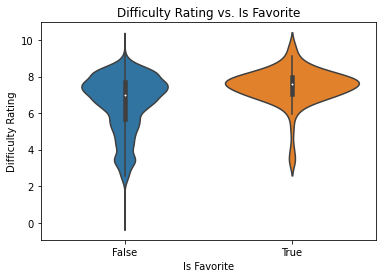

In [27]:
#Jayavelu BAlaji
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting the data
sns.violinplot(data=data, x='is_favorite', y='difficulty_rating_avg')
plt.xlabel('Is Favorite')
plt.ylabel('Difficulty Rating')
plt.title('Difficulty Rating vs. Is Favorite')
plt.show()

In [28]:
#Jayavelu BAlaji
correlation = data['difficulty_rating_avg'].corr(data['is_favorite'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.03139632226468581


In [29]:
#Jayavelu BAlaji
# Remove duplicate data
df = data.drop_duplicates()



In [30]:
#Jayavelu BAlaji
# Create a cross-tabulation table
cross_tab = pd.crosstab(index=workouts_df['difficulty_level'], columns=workouts_df['difficulty_rating_avg'])

# Print the cross-tabulation table
print(cross_tab)

difficulty_rating_avg  0.0000   2.2380   2.3713   2.3718   2.4450   2.5428   \
difficulty_level                                                              
advanced                     0        0        0        0        0        0   
beginner                     0        1        1        1        1        1   
intermediate                 2        0        0        0        0        0   

difficulty_rating_avg  2.5615   2.5622   2.5796   2.5886   ...  8.9014   \
difficulty_level                                           ...            
advanced                     0        0        0        0  ...        0   
beginner                     1        1        1        1  ...        0   
intermediate                 0        0        0        0  ...        1   

difficulty_rating_avg  8.9169   8.9467   8.9716   9.0000   9.0396   9.0522   \
difficulty_level                                                              
advanced                     1        0        1        0        1    

# Inference from above data 
The cross-tabulation table provides insights into the distribution of "difficulty_rating_avg" values for each "difficulty_level" category. It allows us to infer the relationship between these two variables and identify any patterns or trends.

From the table, we can observe the following:

- For the "advanced" difficulty level, there are counts of 0 for all "difficulty_rating_avg" values except for a count of 1 for values 8.9169, 8.9716, 9.0396, 9.0522, 9.0531, 9.0600, and 10.0000.

- For the "beginner" difficulty level, there is a count of 1 for each "difficulty_rating_avg" value from 2.2380 to 2.5886. All other values have a count of 0.

- For the "intermediate" difficulty level, there are counts of 2 for "difficulty_rating_avg" values 0.0000 and 8.9014. All other values have a count of 0.

These observations suggest that there are specific difficulty ratings that are more prevalent for each difficulty level. The cross-tabulation helps us understand the distribution and relationship between the two variables.

# Most Popular Class

In [31]:
#Jayavelu BAlaji
workouts_df = pd.read_csv('datasets/workouts.csv', index_col='id')
classtypes_df = pd.read_csv('datasets/metadata/class_types-metadata.csv', index_col='id') 
workouts_df['class_type_ids'] = [classtypes_df.loc[x[2:-2]]["name"] if x[2:-2] in classtypes_df.index else None for x in workouts_df['class_type_ids']]
class_type_counts = workouts_df['class_type_ids'].value_counts()
class_type_df = pd.DataFrame(class_type_counts)
class_type_df.columns =['Number of Classes']
class_type_df

/tmp/ipykernel_10898/3906897069.py:1: DtypeWarning: Columns (45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  workouts_df = pd.read_csv('datasets/workouts.csv', index_col='id')


,Number of Classes
Music (Cycling),6231
Intervals,2666
Yoga Flow,2194
Music (Running),1960
Intervals Running,1060
...,...
Peloton Studio Original (Cycling),3
Peloton Studio Original (Walking),3
Beyond the Pose (Meditation),2
Core Stretch,1


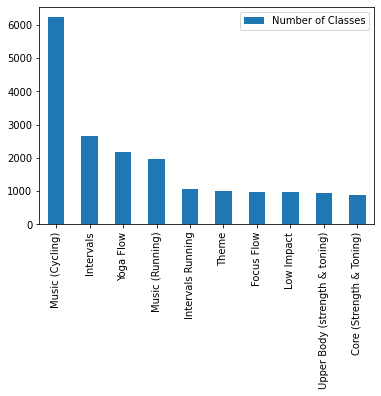

In [32]:
ax = class_type_df[0:10].plot.bar(use_index=True, y='Number of Classes')

# Trying to solve a   binary classification problem. Specifically, it is attempting to predict whether a workout is marked as a favorite or not based on certain features.

The dataset used in the code contains information about workouts, such as duration, difficulty level, fitness discipline, and overall rating average. The target variable, 'is_favorite', indicates whether a particular workout is marked as a favorite by users.

By training a Random Forest Classifier on this data, the code aims to learn patterns and relationships between the given features and the target variable. Once the model is trained, it can make predictions on new, unseen data to determine whether a workout is likely to be marked as a favorite or not.

This classification problem can have various applications in the fitness industry. For example, it can help fitness platforms like Peloton understand the factors that contribute to user engagement and identify which workouts are more likely to be favored by users. This information can then be used to personalize recommendations, improve user experience, and optimize content creation to increase user satisfaction and retention.

Note: The specific problem being solved may vary depending on the dataset and the context in which the code is applied.

In [33]:
#Jayavelu BAlaji
# Load the workout dataset
dataset = pd.read_csv('datasets/workouts.csv')

# Select relevant columns for the model
features = ['duration', 'difficulty_level', 'fitness_discipline', 'overall_rating_avg']
target = 'is_favorite'

# Drop rows with missing values
dataset = dataset.dropna(subset=features + [target])

# Apply label encoding to categorical variables
label_encoder = LabelEncoder()
dataset['difficulty_level'] = label_encoder.fit_transform(dataset['difficulty_level'])
dataset['fitness_discipline'] = label_encoder.fit_transform(dataset['fitness_discipline'])

# Split the data into features (X) and target (y)
X = dataset[features]
y = dataset[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


/tmp/ipykernel_10898/2556882643.py:2: DtypeWarning: Columns (45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('datasets/workouts.csv')


RandomForestClassifier(random_state=42)

In [34]:
#karen ipema
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9994739610731194
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1900
        True       0.00      0.00      0.00         1

    accuracy                           1.00      1901
   macro avg       0.50      0.50      0.50      1901
weighted avg       1.00      1.00      1.00      1901



/home/jay/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jay/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jay/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Preprocessing to NLP MODEL 

In [35]:
#Jayavelu BAlaji
instructors = instructors_df.dropna(subset=['bio'])

In [36]:
#Jayavelu BAlaji
data.columns

Index(['id', 'availability', 'class_type_ids', 'content_provider',
       'content_format', 'description', 'difficulty_estimate',
       'overall_estimate', 'difficulty_rating_avg', 'difficulty_rating_count',
       'difficulty_level', 'duration', 'equipment_ids', 'equipment_tags',
       'explicit_rating', 'extra_images', 'fitness_discipline',
       'fitness_discipline_display_name', 'has_closed_captions',
       'has_pedaling_metrics', 'home_peloton_id', 'image_url', 'instructor_id',
       'individual_instructor_ids', 'is_archived', 'is_closed_caption_shown',
       'is_explicit', 'has_free_mode', 'is_live_in_studio_only', 'language',
       'origin_locale', 'length', 'live_stream_id', 'live_stream_url',
       'location', 'metrics', 'original_air_time', 'overall_rating_avg',
       'overall_rating_count', 'pedaling_start_offset', 'pedaling_end_offset',
       'pedaling_duration', 'rating', 'ride_type_id', 'ride_type_ids',
       'sample_vod_stream_url', 'sample_preview_stream_url'

In [37]:
#Jayavelu BAlaji
instructors.columns

Index(['id', 'bio', 'short_bio', 'coach_type', 'is_filterable',
       'is_instructor_group', 'is_visible', 'is_announced', 'list_order',
       'featured_profile', 'film_link', 'facebook_fan_page', 'music_bio',
       'spotify_playlist_uri', 'background', 'ordered_q_and_as',
       'instagram_profile', 'strava_profile', 'twitter_profile', 'quote',
       'username', 'name', 'first_name', 'last_name', 'user_id',
       'life_style_image_url', 'bike_instructor_list_display_image_url',
       'web_instructor_list_display_image_url',
       'ios_instructor_list_display_image_url', 'about_image_url', 'image_url',
       'jumbotron_url', 'jumbotron_url_dark', 'jumbotron_url_ios',
       'web_instructor_list_gif_image_url', 'instructor_hero_image_url',
       'workout_share_images', 'fitness_disciplines'],
      dtype='object')

In [38]:
#Jayavelu BAlaji
# Check if ID exists in df2
df_merged = pd.merge(data, instructors[['id', 'bio']], how='left', left_on='instructor_id', right_on='id')

# Rename the 'bio' column from df2 to 'additional_bio'
df_merged = df_merged.rename(columns={'bio': 'instructor_bio','image_url':'instructor_img'})

In [39]:
#Jayavelu BAlaji
df = df_merged.drop(['instructor_id','id_x'],axis =1) 

In [40]:
#Jayavelu BAlaji
df.columns

Index(['availability', 'class_type_ids', 'content_provider', 'content_format',
       'description', 'difficulty_estimate', 'overall_estimate',
       'difficulty_rating_avg', 'difficulty_rating_count', 'difficulty_level',
       'duration', 'equipment_ids', 'equipment_tags', 'explicit_rating',
       'extra_images', 'fitness_discipline', 'fitness_discipline_display_name',
       'has_closed_captions', 'has_pedaling_metrics', 'home_peloton_id',
       'instructor_img', 'individual_instructor_ids', 'is_archived',
       'is_closed_caption_shown', 'is_explicit', 'has_free_mode',
       'is_live_in_studio_only', 'language', 'origin_locale', 'length',
       'live_stream_id', 'live_stream_url', 'location', 'metrics',
       'original_air_time', 'overall_rating_avg', 'overall_rating_count',
       'pedaling_start_offset', 'pedaling_end_offset', 'pedaling_duration',
       'rating', 'ride_type_id', 'ride_type_ids', 'sample_vod_stream_url',
       'sample_preview_stream_url', 'scheduled_start

In [41]:
#Jayavelu BAlaji
df = df[['class_type_ids','description','difficulty_rating_avg','instructor_bio','difficulty_level','content_format','language','has_closed_captions','instructor_img']]

In [42]:
#Jayavelu BAlaji
df.columns

Index(['class_type_ids', 'description', 'difficulty_rating_avg',
       'instructor_bio', 'difficulty_level', 'content_format', 'language',
       'has_closed_captions', 'instructor_img'],
      dtype='object')

In [43]:
#Jayavelu BAlaji
df.to_csv('peloton_nlp.csv') 